### Where to Start with Machine Learning and Deep Learning?

This is an honestly difficult question - and you'll see a variety of different approaches. Some start "bottom-up", meaning one tries to learn all of the components of machine learning before actually attempting it. Others start "top-down", meaning one runs machine learning programs or projects before understanding much of how it works, and then tries to understand the components from the most general "down" to the highly specific.

We will tend more towards the top-down approach, but inject focus on specific concepts that are both technical and part of the machine learning terminology. Machine learning involves the fields of applied mathematics, computer science, statistics, information theory, and neuroscience - and that's at a minimum! So, be **patient** with yourself as you take your first steps into this interesting and challenging world. There is a great deal to learn, explore and refine.

Anyways, it would seem a good idea to start with the idea of **learning** before attempting anything further. What is "learning" for a computer (e.g., a machine)?

The basic concept is that *in order to learn there must be:  
* a **target** (like a learning goal or task)
* **training** on target samples
* **testing** performance on new samples 
* a **cost**, also called **loss**, for correction/direction 

Let's say we want a machine learning program that can tell if an image contains a dog or a cat. This is our **target**, and we want to achieve this goal with as high accuracy (little error) as possible. We will **train** our program on sample images of dogs and cats that we have pre-labeled. After training, we will **test** our program (also called a **model**) on new sample images of dogs and cats that we have not yet shown our program. During both the traning and testing processes, we must help our program learn by applying **cost**, or **loss**, when it makes a mistake. Conceptually, this not unlike a classic education model you find at school. 

Let's have a look at how this all works (and doesn't) in a very basic ML program (adapted from: https://github.com/aymericdamien/TensorFlow-Examples ).



In [1]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow as tf
import tensorflow.contrib.layers as tfl
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jonathan.she

In [2]:
# Parameters 
learning_rate = 0.05
training_epochs = 1000 #how many cycles of training
display_step = 50

In [3]:
# Training Data 
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# Normalize data by "smushing" to 0.0 - 1.0 "unit" range
train_X = train_X/np.ndarray.max(train_X)
train_Y = train_Y/np.ndarray.max(train_Y)

print(train_X, train_Y)

[0.3058104  0.4077472  0.509684   0.62181448 0.64220183 0.3862478
 0.90621814 0.57288481 0.70336391 0.20081549 0.65258085 1.
 0.49235474 0.74108053 0.52395515 0.85904921 0.28727643] [0.49062049 0.7965368  0.6031746  0.92063492 0.48888889 0.45396825
 0.97142857 0.74920635 0.73015873 0.35238095 0.81587302 1.
 0.47619048 0.83809524 0.6984127  0.84848485 0.37518038]


In [4]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.get_variable("weight", initializer=tf.Variable(np.abs(np.random.randn()), dtype=tf.float32))
b = tf.get_variable("bias", initializer=tf.Variable(np.abs(np.random.randn()), dtype=tf.float32))

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


In [5]:
# Construct a linear model to predict output of Y given X
Y_pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/n_samples
# Gradient descent applies our cost/loss function for us
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.013028451 W= 0.7162994 b= 0.26936692
Epoch: 0100 cost= 0.012965348 W= 0.72711945 b= 0.26328182
Epoch: 0150 cost= 0.012921577 W= 0.7360451 b= 0.25792357
Epoch: 0200 cost= 0.012890715 W= 0.743532 b= 0.25342855
Epoch: 0250 cost= 0.012868940 W= 0.749813 b= 0.2496577
Epoch: 0300 cost= 0.012853569 W= 0.75508225 b= 0.24649428
Epoch: 0350 cost= 0.012842715 W= 0.75950223 b= 0.24384047
Epoch: 0400 cost= 0.012835047 W= 0.7632098 b= 0.24161436
Epoch: 0450 cost= 0.012829624 W= 0.7663197 b= 0.23974738
Epoch: 0500 cost= 0.012825785 W= 0.76892835 b= 0.23818116
Epoch: 0550 cost= 0.012823060 W= 0.77111715 b= 0.23686711
Epoch: 0600 cost= 0.012821130 W= 0.77295333 b= 0.23576461
Epoch: 0650 cost= 0.012819759 W= 0.77449363 b= 0.23483987
Epoch: 0700 cost= 0.012818780 W= 0.77578616 b= 0.23406395
Epoch: 0750 cost= 0.012818081 W= 0.77686983 b= 0.23341334
Epoch: 0800 cost= 0.012817586 W= 0.7777791 b= 0.2328672
Epoch: 0850 cost= 0.012817229 W= 0.7785419 b= 0.23240945
Epoch: 0900 cost= 0.012816

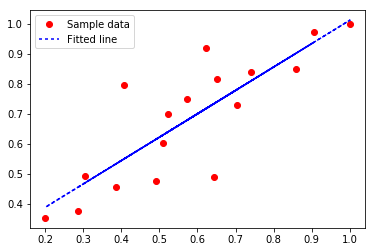

In [8]:

# Start training# Start 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot sample data
    plt.plot(train_X, train_Y, 'ro', label='Sample data')
    
    #Plot linear prediction
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), dashes=[2, 2], color='blue', label='Fitted line')
    plt.legend()
    plt.show()

You can compare this 'toy' model with Google's widget here: https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise

What is essential to notice is how the cost updates the **weight** and **bias** of our predicted output for Y. This allows our program to "fit" the data by charting a line through the central relationship between X and Y samples.

While our model is able to fit a straight line through linear data, it is quite limited. A straight line can only separate very linear data. What if our data is non-linear (e.g. curved) or if has significant outliers (extreme values)? A linear cost function won't work - Let's see if we can fit a quadratic cost function to such a data collection. 

In [9]:
#reset our graph values
tf.reset_default_graph()

In [10]:
train_X = np.linspace(0, 1, 100)

train_Y = []
for _ in range(len(train_X)):
    train_Y = np.sin(train_X*np.pi*2) + np.random.uniform(0., 1., len(train_X)) + 1

train_Y = train_Y/np.ndarray.max(train_Y)
    
n_samples = train_X.shape[0]

In [11]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.get_variable("weight", initializer=tf.Variable(np.random.randn()), dtype=tf.float32)
b = tf.get_variable("bias", initializer=tf.constant(0, dtype=tf.float32))

In [12]:
# Construct a polynomial model to predict output of Y given X
#Y_pred = X**2 + X*W + b
#Y_pred = tf.add(tf.add(tf.multiply(X, X), tf.multiply(X, W)), b)
Y_pred = tf.Variable(tf.random_normal([1]), name='prediction')
for pow_i in range(1, 4):
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), tf.add(Y_pred, b))
    

In [13]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/n_samples
# Gradient descent applies our cost/loss function for us
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.030304879 W= -0.1883009 b= 0.35023496
Epoch: 0100 cost= 0.030493060 W= -0.17550576 b= 0.34461147
Epoch: 0150 cost= 0.030505640 W= -0.17503263 b= 0.34440336
Epoch: 0200 cost= 0.030506095 W= -0.17501582 b= 0.34439754
Epoch: 0250 cost= 0.030506114 W= -0.17501512 b= 0.34439954
Epoch: 0300 cost= 0.030506117 W= -0.17501503 b= 0.34440175
Epoch: 0350 cost= 0.030506117 W= -0.17501503 b= 0.34440398
Epoch: 0400 cost= 0.030506117 W= -0.17501503 b= 0.34440622
Epoch: 0450 cost= 0.030506117 W= -0.17501503 b= 0.34440845
Epoch: 0500 cost= 0.030506117 W= -0.17501503 b= 0.3444107
Epoch: 0550 cost= 0.030506117 W= -0.17501503 b= 0.34441292
Epoch: 0600 cost= 0.030506117 W= -0.17501503 b= 0.34441516
Epoch: 0650 cost= 0.030506117 W= -0.17501503 b= 0.3444174
Epoch: 0700 cost= 0.030506117 W= -0.17501503 b= 0.34441963
Epoch: 0750 cost= 0.030506117 W= -0.17501503 b= 0.34442186
Epoch: 0800 cost= 0.030506117 W= -0.17501503 b= 0.3444241
Epoch: 0850 cost= 0.030506117 W= -0.17501503 b= 0.34442633
E

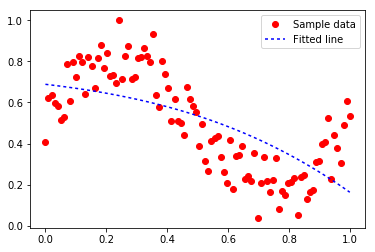

In [15]:

# Start training# Start 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot sample data
    plt.plot(train_X, train_Y, 'ro', label='Sample data')
    #Plot linear prediction
    #plt.plot(train_X, train_X * train_X + sess.run(W) * train_X + sess.run(b), dashes=[2, 2], color='blue', label='Fitted line')
    plt.plot(train_X, sess.run(Y_pred, feed_dict={X: train_X}), dashes=[2, 2], color='blue', label='Fitted line')
    
    # all this just to avoid duplicating legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.show()

In [16]:
tf.reset_default_graph()
sess.close()

This does a bad job of fitting. Visually, we can see it curve, but it has no ability to fit the data, which is has sine wave motion. Our function is **underfitting**. **Overfitting**, on the other hand, is when our cost function is *too* complex for our data. This can often be shown as curving too much or in the wrong directions.

### Network Layers and Nonlinear Activation Functions

Our model above has a major problem: the polynomial function we used for **regression** (our Y_pred prediction of the true Y given X) is not able to **generalize** well (meaning it cannot fit a wide variety of data ranges and features). While we could certainly find better machine learning algorithms than this poor polynomial regression or condition the data so it can fit, let's jump on the deep learning bandwagon and see how it can approach this problem. 

Deep learning has found that adding "layers" and **"activation"** functions can help models better fit more generalized data. You can think of layers as multiple levels of a process - for example instead of one instance of Y_pred = WX + b, we could do it several times in a chain, like: ```L1 = WX + b, and L2 = W*L1 + b and Y_pred = W*L2 + b```. So we pass the result of each layer to the next layer. And we can transform dimensions during this process too. It can get very technical, so we'll just focus on coding it and seeing it in action.

And for the so-called activation functions, you can think of these as functions that give a certain shape to a range of numbers. These activation functions are generally **nonlinear**, and common examples are tanh, sigmoid and relu. See below

/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


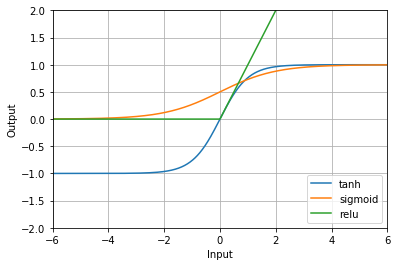

In [17]:
# These activations each give a particular output range for the input range 

x_ = np.linspace(-6,6,1000)
with tf.Session() as sess:
    plt.plot(x_, tf.nn.tanh(x_).eval(), label='tanh')
    plt.plot(x_, tf.nn.sigmoid(x_).eval(), label='sigmoid')
    plt.plot(x_, tf.nn.relu(x_).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')
plt.show()



Here instead of feeding our training examples 1 by 1, we are going to feed them by **batches**. Batches are groups of samples, and this has some benefits. First, they can be more computationally efficient (on GPUs) by grouping array operations. Second, if we randomize the examples in the batches, we can help ensure that our model is not learning *based on the repeating order of training examples*, as this could greatly distort the performance capabilities of the model in a real setting.

In [18]:
sess = tf.Session()
#g = tf.Graph()

train_X = np.linspace(0, 1, 1000)

train_Y = []
for _ in range(len(train_X)):
    train_Y = np.sin(train_X*np.pi*2) + np.random.uniform(0., 1., len(train_X)) + 1

train_Y = train_Y/np.ndarray.max(train_Y)
    
n_samples = train_X.shape[0]

idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [19]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        cost = tf.reduce_mean(tf.abs(Y_pred - Y))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

        # We now run a loop over epochs
        for it_i in range(n_iterations):
            # scrambles the order of data so the model can't learn what comes next
            idxs = np.random.permutation(range(len(train_X)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: train_X[idxs_i], Y: train_Y[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})

            if it_i % 50 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: train_X}, session=sess)
                fig, ax = plt.subplots(1, 1)
                ax.scatter(train_X, train_Y, alpha=0.99, c='r')
                ax.set_xlim([0, 1])
                ax.set_ylim([0, 1])
                ax.plot(train_X, ys_pred, 'k', alpha=it_i / n_iterations, lw=4)
                print(training_cost, "interation %d" % (it_i))
                fig.show()
                plt.draw()
                plt.show()
    


In [20]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        if activation is None:
            h = tf.matmul(X, W) + b
        if activation is "tanh":
            h = tf.nn.tanh(tf.matmul(X, W) + b, name='tanh')
        if activation is "sigmoid":
            h = tf.nn.sigmoid(tf.matmul(X, W) + b, name='sigmoid')
        if activation is "relu":
            h = tf.nn.relu(tf.matmul(X, W) + b, name='relu')
        print(tf.shape(h))
        return h

Let's see a single layer with the relu activation function, in which we input 1-node and output 10.

Tensor("layer_1/Shape:0", shape=(?,), dtype=int32)
0.33385712 interation 0


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


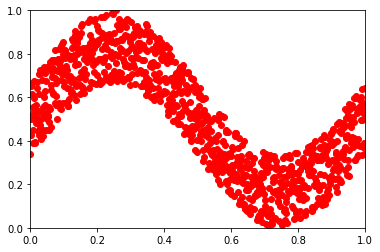

0.14095245 interation 50


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


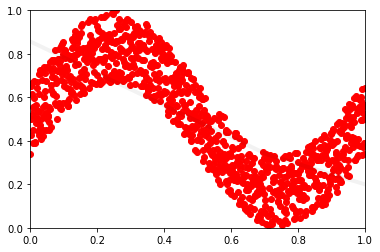

0.1401004 interation 100


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


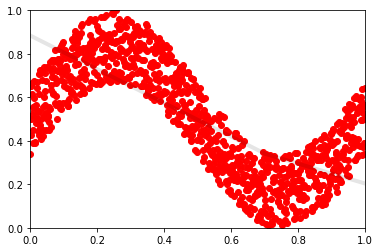

0.13944706 interation 150


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


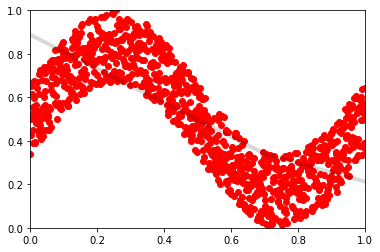

0.13875183 interation 200


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


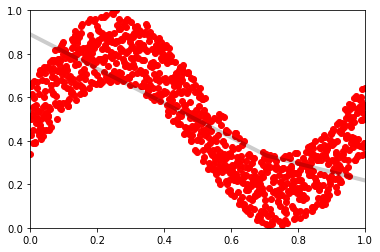

0.13814074 interation 250


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


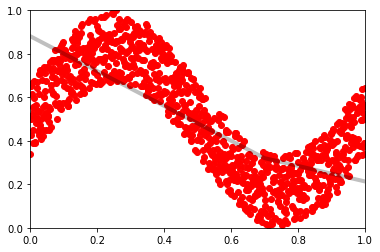

0.13742645 interation 300


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


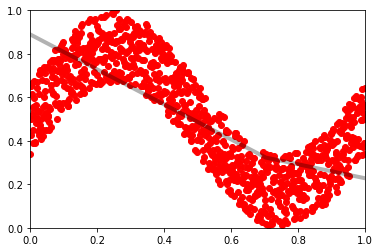

0.13685812 interation 350


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


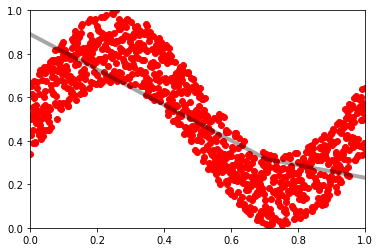

0.13644919 interation 400


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


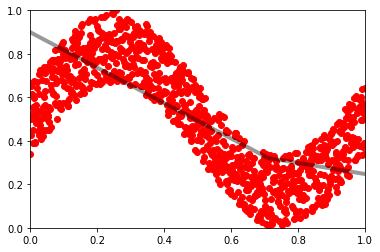

0.1357695 interation 450


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


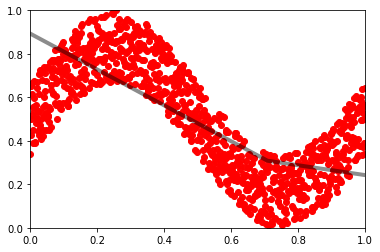

0.13569273 interation 500


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


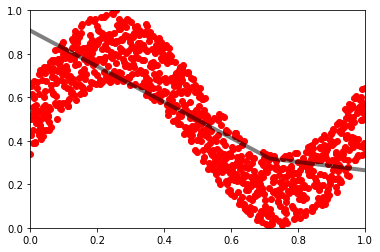

0.13476074 interation 550


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


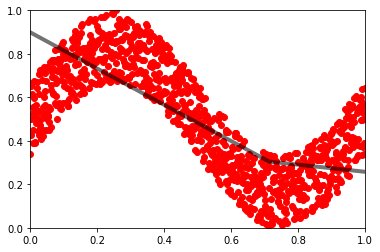

0.13428299 interation 600


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


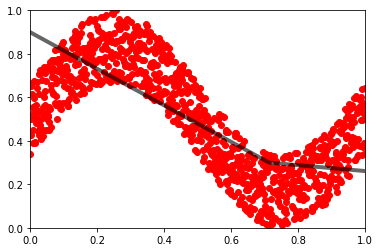

0.13381988 interation 650


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


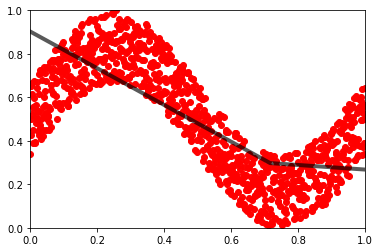

0.13337754 interation 700


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


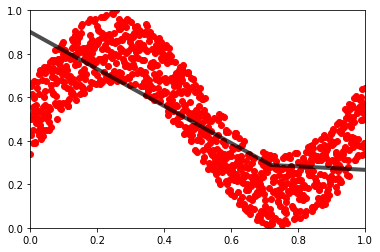

0.13306944 interation 750


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


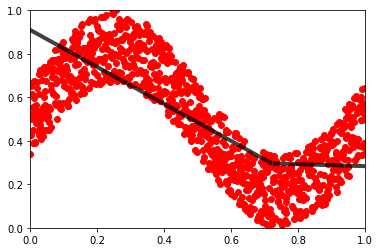

0.13251351 interation 800


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


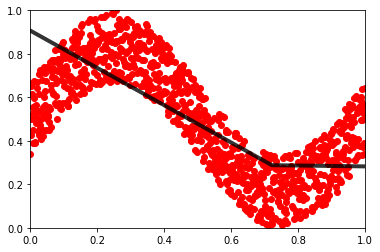

0.13209236 interation 850


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


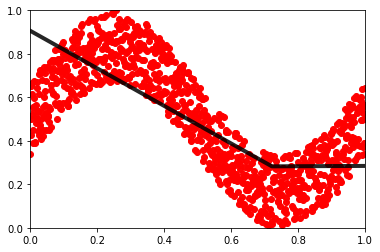

0.13170181 interation 900


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


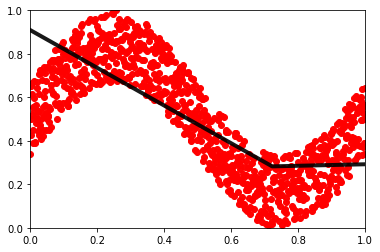

0.13136053 interation 950


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


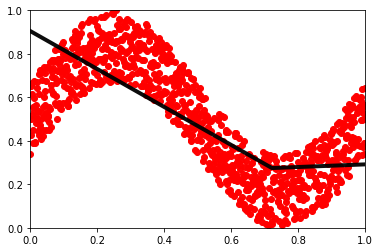

In [21]:

# tf Graph Input
X = tf.placeholder(tf.float32, name="x")
Y = tf.placeholder(tf.float32, name="y")
X_1 = tf.expand_dims(X,1)
h = linear(X_1, 1, 10, activation='relu', scope='layer_1')
Y_pred = tf.reduce_sum(h, 1) 

# And retrain w/ our new Y_pred
train(X, Y, Y_pred, n_iterations=1000)

Now for 3 interconnected layers of that is wide and then slimmer with input and output nodes.

Tensor("layer_1/Shape:0", shape=(?,), dtype=int32)
Tensor("layer_2/Shape:0", shape=(?,), dtype=int32)
Tensor("layer_3/Shape:0", shape=(?,), dtype=int32)
0.270794 interation 0


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


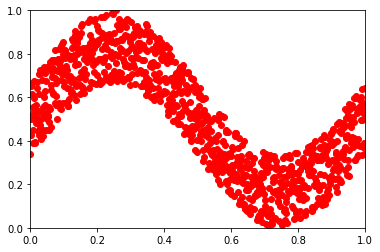

0.12641406 interation 50


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


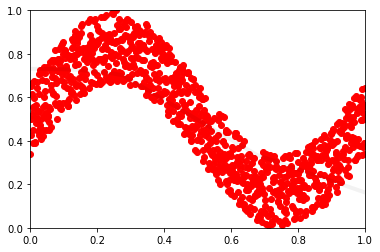

0.11553415 interation 100


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


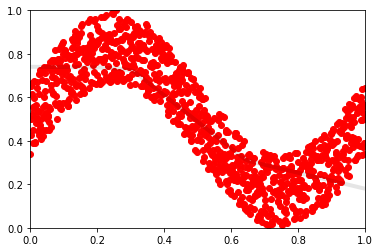

0.10634942 interation 150


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


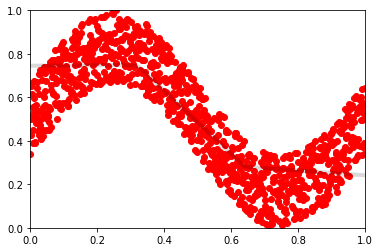

0.10186969 interation 200


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


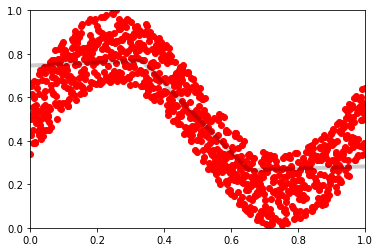

0.09656727 interation 250


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


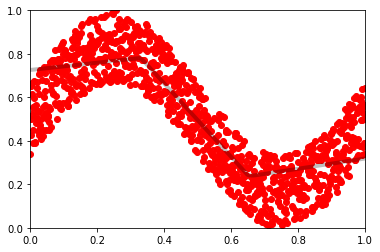

0.092665054 interation 300


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


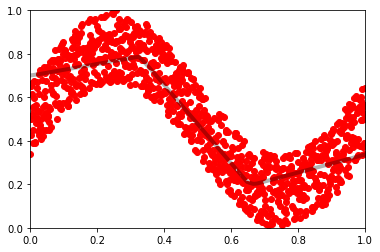

0.089732744 interation 350


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


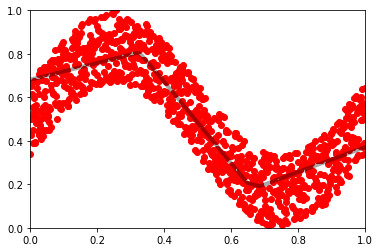

0.087987006 interation 400


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


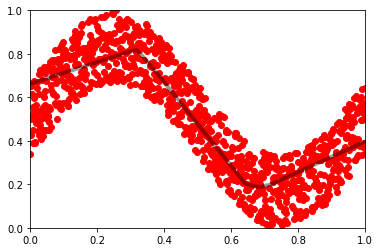

0.08676062 interation 450


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


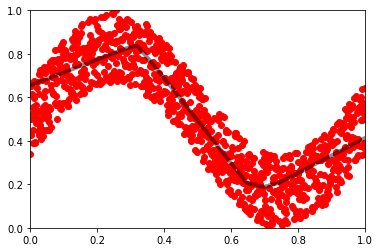

0.08787531 interation 500


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


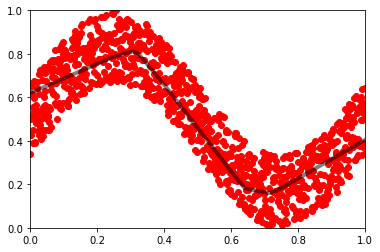

0.08593802 interation 550


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


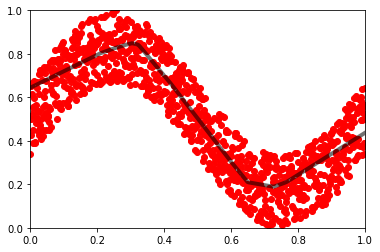

0.086661085 interation 600


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


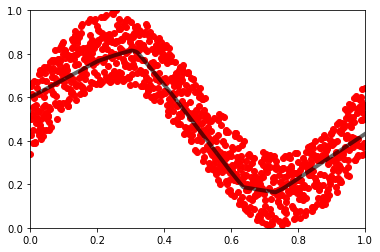

0.084735304 interation 650


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


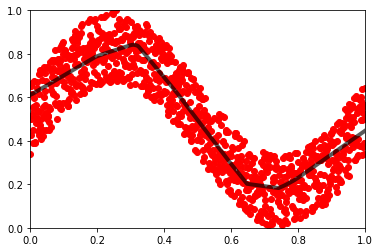

0.0846935 interation 700


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


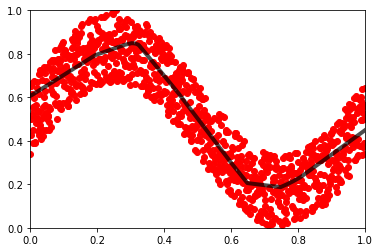

0.08447154 interation 750


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


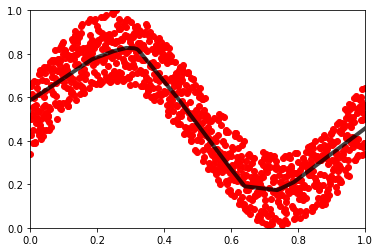

0.08393552 interation 800


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


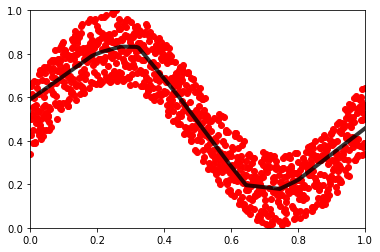

0.0837452 interation 850


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


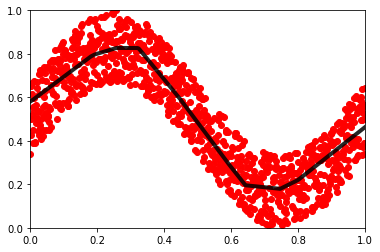

0.0857776 interation 900


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


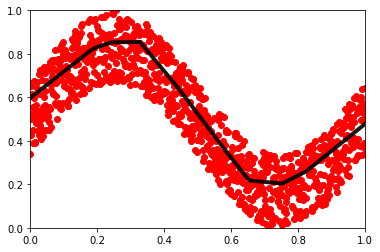

0.08377618 interation 950


/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


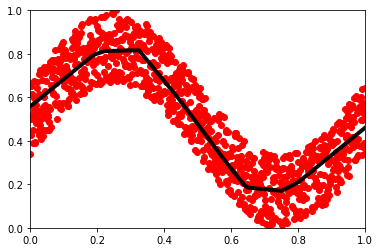

In [28]:
tf.reset_default_graph()
# tf Graph Input
X = tf.placeholder(tf.float32, name="x")
Y = tf.placeholder(tf.float32, name="y")
# to avoid TF complaining about non-matrix mult.
X_1 = tf.expand_dims(X,1)
h = linear(X_1, 1, 100, activation='relu', scope='layer_1')
h2 = linear(h, 100, 50, activation='relu', scope='layer_2')
h3 = linear(h2, 50, 10, activation='relu', scope='layer_3')
Y_pred = tf.reduce_sum(h3, 1) 

# And retrain w/ our new Y_pred
train(X, Y, Y_pred, n_iterations=1000)

Which combinations of activation functions and layers and nodes work best for you, and why? What if we had different training data ranges?

In [23]:
for op in tf.get_default_graph().get_operations(): 
    print(op.name)

x
y
ExpandDims/dim
ExpandDims
layer_1/W/Initializer/random_normal/shape
layer_1/W/Initializer/random_normal/mean
layer_1/W/Initializer/random_normal/stddev
layer_1/W/Initializer/random_normal/RandomStandardNormal
layer_1/W/Initializer/random_normal/mul
layer_1/W/Initializer/random_normal
layer_1/W
layer_1/W/Assign
layer_1/W/read
layer_1/b/Initializer/Const
layer_1/b
layer_1/b/Assign
layer_1/b/read
layer_1/MatMul
layer_1/add
layer_1/relu
layer_1/Shape
layer_2/W/Initializer/random_normal/shape
layer_2/W/Initializer/random_normal/mean
layer_2/W/Initializer/random_normal/stddev
layer_2/W/Initializer/random_normal/RandomStandardNormal
layer_2/W/Initializer/random_normal/mul
layer_2/W/Initializer/random_normal
layer_2/W
layer_2/W/Assign
layer_2/W/read
layer_2/b/Initializer/Const
layer_2/b
layer_2/b/Assign
layer_2/b/read
layer_2/MatMul
layer_2/add
layer_2/relu
layer_2/Shape
layer_3/W/Initializer/random_normal/shape
layer_3/W/Initializer/random_normal/mean
layer_3/W/Initializer/random_normal/s

In [24]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [25]:
show_graph(tf.get_default_graph())